In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cwd = Path.cwd()
df2 = pd.read_csv(cwd.parent /'data/clean_02.csv')


In [26]:
df2['domain']

0        nobell.it/70ffb52d079109dca5664cce6f317373782/...
1        www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2        serviciosbys.com/paypal.cgi.bin.get-into.herf....
3        mail.printakid.com/www.online.americanexpress....
4        thewhiskeydregs.com/wp-content/themes/widescre...
                               ...                        
95930     https://www.instagram.com/friends_.monica/?hl=en
95931    https://www.reddit.com/r/OMSA/comments/18kw0p0...
95932    https://gatech.enterprise.slack.com/?redir=%2F...
95933    https://www.reddit.com/search/?q=%22Musk%22+AN...
95934    https://dynamicbusiness.com/locked/norton-reve...
Name: domain, Length: 95935, dtype: object

In [27]:
print(1 if re.match(r'^https?://', '123://') else 0)

0


In [28]:
def alphabet_ratio(url):
    url_length = len(url)
    alphabet_count = len(re.findall('[A-Za-z]',url))
    ratio = alphabet_count/ url_length
    return ratio

def digit_ratio(url):
    url_length = len(url)
    digit_count = len(re.findall('[\\d+]',url))
    ratio = digit_count/ url_length
    return ratio

def non_alphanumeric_ratio(url):
    url_length = len(url)
    non_alphanumeric_count = len(re.findall('[^a-zA-Z0-9]', url))
    ratio = non_alphanumeric_count/ url_length
    return ratio

def dot_count(url):
    return len(re.findall('[.]', url))

def dash_count(url):
    return len(re.findall('[-]', url))

def underscore_count(url):
    return len(re.findall('[_]', url))

def slash_count(url):
    return len(re.findall('[/]', url))

def q_mark_count(url):
    return len(re.findall('[?]', url))

def percentage_count(url):
    return len(re.findall('[%]', url))

def has_legit_http(url):
    # re.match checks for a match only at the beginning of the string
    if re.match(r'^https?://', url):
        return 1
    return 0

def has_http_in_path(url):

    if 'http' in url[8:]:
        return 1
    return 0

def php (url):
    return int(len(re.findall('php', url)) > 0)

def html (url):
    return int(len(re.findall('html', url)) > 0)

def feature_extraction(df, col):
    df_copy = df.copy()
    df_copy['length'] = df[col].apply(len)
    df_copy['alphabet_ratio'] = df[col].apply(alphabet_ratio)
    df_copy['digit_ratio'] = df[col].apply(digit_ratio)
    df_copy['non_alphanumeric_ratio'] = df[col].apply(non_alphanumeric_ratio)
    df_copy['dot_count'] = df[col].apply(dot_count)
    df_copy['underscore_count'] = df[col].apply(underscore_count)
    df_copy['slash_count'] = df[col].apply(slash_count)
    df_copy['q_mark_count'] = df[col].apply(q_mark_count)
    df_copy['percentage_count'] = df[col].apply(percentage_count)
    df_copy['http'] = df[col].apply(has_legit_http)
    df_copy['sus_http'] = df[col].apply(has_http_in_path)
    df_copy['html'] = df[col].apply(html)
    df_copy['php'] = df[col].apply(php)
   

    return df_copy
    

    
df2 = feature_extraction(df2,'domain')

In [29]:
df2[(df2['domain'].str.contains('account'))& (df2['label']==0)]

,domain,label,length,alphabet_ratio,digit_ratio,non_alphanumeric_ratio,dot_count,underscore_count,slash_count,q_mark_count,percentage_count,http,sus_http,html,php
47907,www.financialaccounting.com/financialprof.htm,0.0,45,0.911111,0.000000,0.088889,3,0,1,0,0,0,0,0,0
47913,www.straffordpub.com/content/accounting,0.0,39,0.897436,0.000000,0.102564,2,0,2,0,0,0,0,0,0
47914,www.byuaccounting.net/mediawiki,0.0,31,0.903226,0.000000,0.096774,2,0,1,0,0,0,0,0,0
47916,www.accountpro.net/en/int_e.htm,0.0,31,0.806452,0.000000,0.193548,3,1,2,0,0,0,0,0,0
47932,www.accountingwebsite.com/marvin,0.0,32,0.906250,0.000000,0.093750,2,0,1,0,0,0,0,0,0
47950,www.accountantsofficeonline.com/members/Trigi1...,0.0,51,0.803922,0.098039,0.098039,2,0,3,0,0,0,0,0,0
47954,fso.cpasitesolutions.com/accountinggroup/,0.0,41,0.902439,0.000000,0.097561,2,0,2,0,0,0,0,0,0
47976,www.cpateam.com/accounting-directories.htm,0.0,42,0.880952,0.000000,0.119048,3,0,1,0,0,0,0,0,0
47978,www.accountantsworld.com/list/directorylist.aspx,0.0,48,0.895833,0.000000,0.104167,3,0,2,0,0,0,0,0,0
47980,www.topix.com/rss/business/accounting.xml,0.0,41,0.853659,0.000000,0.146341,3,0,3,0,0,0,0,0,0


In [30]:
df2 = df2.drop(columns=['domain'])

df2.head()

,label,length,alphabet_ratio,digit_ratio,non_alphanumeric_ratio,dot_count,underscore_count,slash_count,q_mark_count,percentage_count,http,sus_http,html,php
0,1.0,225,0.600000,0.257778,0.142222,6,4,10,1,0,0,0,0,1
1,1.0,81,0.802469,0.012346,0.185185,5,1,4,0,0,0,0,0,1
2,1.0,177,0.627119,0.265537,0.107345,7,0,11,0,0,0,0,0,0
3,1.0,60,0.866667,0.000000,0.133333,6,0,2,0,0,0,0,1,0
4,1.0,116,0.706897,0.181034,0.112069,1,0,10,1,0,0,0,0,0


In [31]:
df2.describe()

,label,length,alphabet_ratio,digit_ratio,non_alphanumeric_ratio,dot_count,underscore_count,slash_count,q_mark_count,percentage_count,http,sus_http,html,php
count,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000,95935.000000
mean,0.499317,64.471246,0.776040,0.073573,0.150456,3.268609,0.292281,2.975588,0.234982,0.133372,0.000250,0.016126,0.261896,0.121176
std,0.500002,65.042980,0.106051,0.114986,0.043745,2.330065,0.863747,1.953460,0.529133,0.982536,0.015815,0.125959,0.439669,0.326333
min,0.000000,9.000000,0.086957,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,0.730769,0.000000,0.121951,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,42.000000,0.810811,0.008621,0.148148,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,71.000000,0.851852,0.115385,0.176471,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2175.000000,0.984368,0.763158,0.602941,37.000000,38.000000,34.000000,17.000000,71.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
malicious_idx = df2[df2['label'] == 1].index
benign_idx = df2[df2['label'] == 0].index

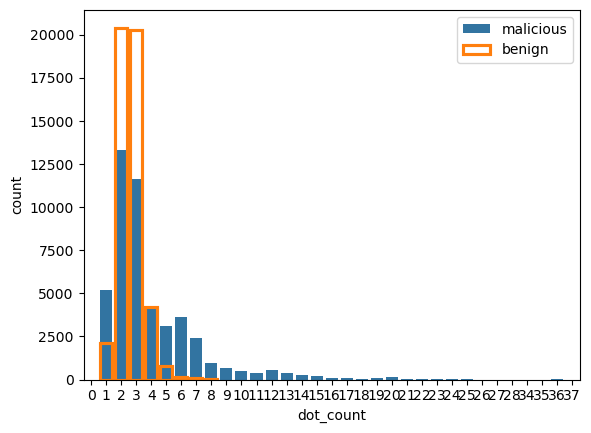

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1)
sns.countplot(x='dot_count', data=df2.iloc[malicious_idx],label = 'malicious')

sns.countplot(x='dot_count', data=df2.iloc[benign_idx], label = 'benign', fill=False)
ax.legend()
plt.show()

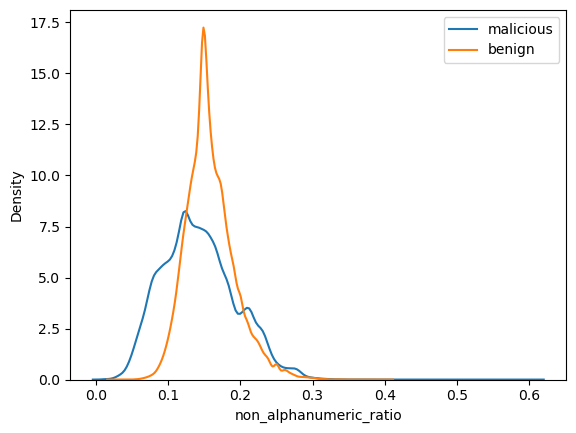

In [11]:
f, ax = plt.subplots(1, 1)
sns.kdeplot(data = df2.loc[malicious_idx,'non_alphanumeric_ratio'], label = "malicious")
sns.kdeplot(data = df2.loc[benign_idx,'non_alphanumeric_ratio'], label = "benign")
ax.legend()
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X = df2.drop(columns=['html','php','http','sus_http']))
pcs

array([[160.63482127,   0.55639361],
       [ 16.56963778,   1.5004353 ],
       [112.64361103,   2.92025895],
       ...,
       [ 20.54112296,  -0.81028355],
       [ 99.51370661,  -3.04105068],
       [ 21.50617663,  -1.45373181]])

In [13]:
pca_df = pd.DataFrame(data = pcs, columns=['PC1','PC2'])
pca_df['label'] = df2['label'].values
pca_df.head()

,PC1,PC2,label
0,160.634821,0.556394,1.0
1,16.569638,1.500435,1.0
2,112.643611,2.920259,1.0
3,-4.434428,2.652793,1.0
4,51.548301,-1.999337,1.0


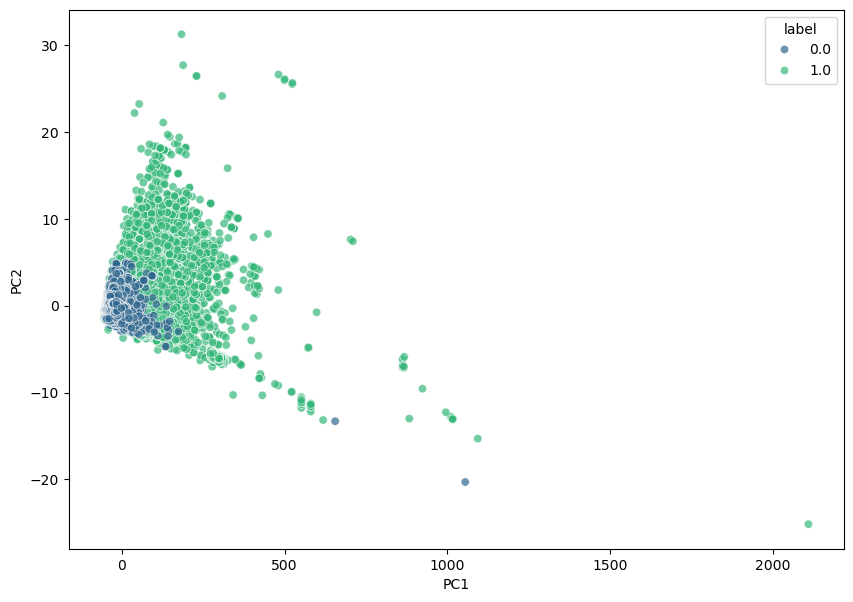

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='label',
    palette='viridis', 
    data=pca_df,
    alpha=0.7 
)
plt.show()

In [10]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


In [14]:
extra_tree_01 = exp.load_model('extra_tree_01')

Transformation Pipeline and Model Successfully Loaded


In [20]:
print(extra_tree_01)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['length', 'alphabet_ratio',
                                             'digit_ratio',
                                             'non_alphanumeric_ratio',
                                             'dot_count', 'underscore_count',
                                             'slash_count', 'q_mark_count',
                                             'percentage_count'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=N

In [ ]:
exp.setup(data = df2, target = 'label', numeric_features=['length','alphabet_ratio','digit_ratio','non_alphanumeric_ratio',
                                                       'dot_count','underscore_count','slash_count','q_mark_count','percentage_count'],
                                                       transformation= True, transformation_method = 'yeo-johnson',normalize= True, normalize_method= 'zscore', train_size = 0.75, 
                                                       data_split_stratify = True, fold_strategy = 'stratifiedkfold', fold = 5, session_id= 123
                                                       )

ValueError: 

Column(s): ['length', 'alphabet_ratio', 'digit_ratio', 'non_alphanumeric_ratio', 'dot_count', 'underscore_count', 'slash_count', 'q_mark_count', 'percentage_count'] not found in the feature dataset!
They are either missing from the features or you have specified a target column as a feature. Available feature columns are:
['domain']

In [18]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8638,0.9184,0.8204,0.8980,0.8574,0.7276,0.7303,0.5020
rf,Random Forest Classifier,0.8630,0.9306,0.8298,0.8884,0.8581,0.7259,0.7275,0.6340
lightgbm,Light Gradient Boosting Machine,0.8613,0.9333,0.8084,0.9036,0.8534,0.7225,0.7265,0.2800
knn,K Neighbors Classifier,0.8561,0.9151,0.8192,0.8841,0.8504,0.7122,0.7141,2.3520
dt,Decision Tree Classifier,0.8478,0.8732,0.8024,0.8821,0.8404,0.6955,0.6984,0.1800
gbc,Gradient Boosting Classifier,0.8441,0.9155,0.7843,0.8904,0.8340,0.6882,0.6931,0.9940
ada,Ada Boost Classifier,0.8214,0.8946,0.7554,0.8699,0.8086,0.6427,0.6484,0.4420
lr,Logistic Regression,0.7785,0.8201,0.6730,0.8524,0.7521,0.5570,0.5697,0.7200
ridge,Ridge Classifier,0.7765,0.8193,0.6748,0.8465,0.7509,0.5529,0.5646,0.1500
lda,Linear Discriminant Analysis,0.7765,0.8193,0.6748,0.8465,0.7509,0.5529,0.5646,0.1320


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [19]:
extra_tree = exp.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8613,0.9167,0.8184,0.8949,0.8549,0.7226,0.7252
1,0.8617,0.9179,0.8163,0.8975,0.8550,0.7234,0.7264
2,0.8645,0.9209,0.8262,0.8944,0.8589,0.7289,0.7311
3,0.8623,0.9145,0.8195,0.8959,0.8560,0.7246,0.7273
4,0.8691,0.9220,0.8216,0.9076,0.8624,0.7383,0.7416
Mean,0.8638,0.9184,0.8204,0.8980,0.8574,0.7276,0.7303
Std,0.0029,0.0027,0.0034,0.0049,0.0029,0.0058,0.0060


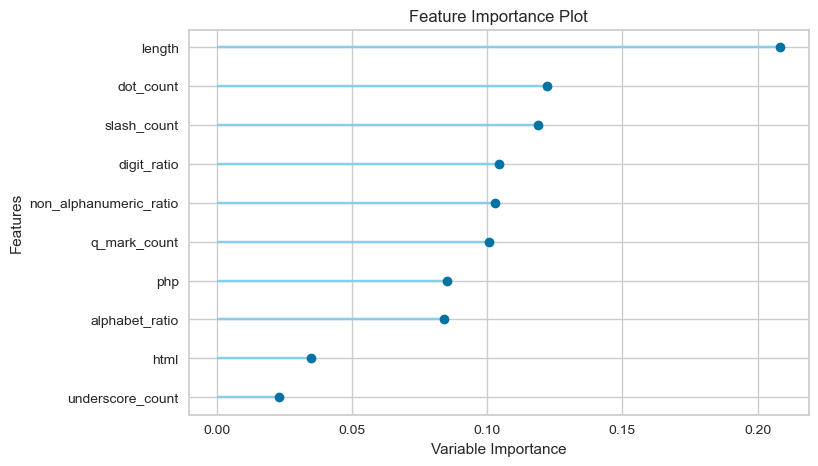

In [20]:
exp.plot_model(extra_tree, plot = 'feature')

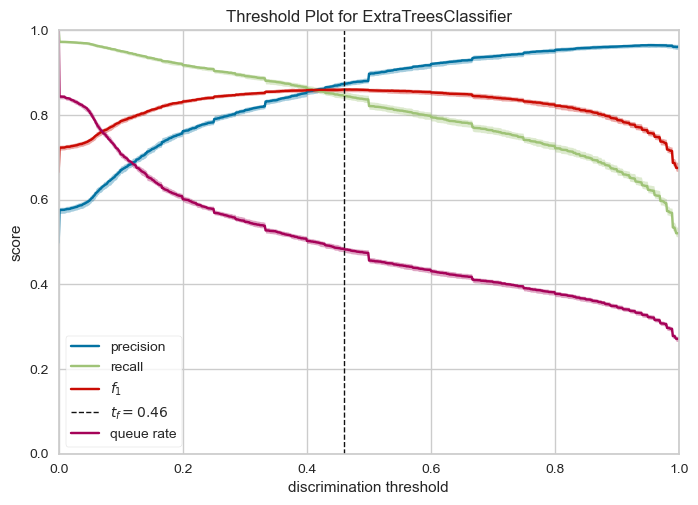

In [204]:
exp.plot_model(extra_tree, plot='threshold')


In [21]:
predictions_with_new_threshold = exp.predict_model(
    extra_tree,
    probability_threshold=0.5
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8636,0.9206,0.8396,0.8816,0.8601,0.7272,0.7280


In [22]:
exp.save_model(extra_tree, 'extra_tree_phish_data_02')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['length', 'alphabet_ratio',
                                              'digit_ratio',
                                              'non_alphanumeric_ratio',
                                              'dot_count', 'underscore_count',
                                              'slash_count', 'q_mark_count',
                                              'percentage_count'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      

In [6]:
extra_tree_phish_data_02 = exp.load_model('extra_tree_phish_data_02')

Transformation Pipeline and Model Successfully Loaded


In [44]:
url = 'https://www.edx.org/learn/math/imperial-college-london-a-level-mathematics-for-year-13-course-2-general-motion-moments-and-equilibrium-the-normal-distribution-vectors-differentiation-methods-integration-methods-and-differential-equations'

test_df = pd.DataFrame([{'url':url}])

In [45]:
test_df = feature_extraction(test_df,'url')
test_df = test_df.drop(columns = ['url'])

test_df

,length,alphabet_ratio,digit_ratio,non_alphanumeric_ratio,dot_count,underscore_count,slash_count,q_mark_count,percentage_count,http,sus_http,html,php
0,237,0.843882,0.012658,0.14346,2,0,5,0,0,1,0,0,0


In [46]:
predictions = exp.predict_model(extra_tree_phish_data_02, data=test_df, probability_threshold=0.5)
print(predictions)

   length  alphabet_ratio  digit_ratio  non_alphanumeric_ratio  dot_count  \
0     237        0.843882     0.012658                 0.14346          2   

   underscore_count  slash_count  q_mark_count  percentage_count  http  \
0                 0            5             0                 0     1   

   sus_http  html  php  prediction_label  prediction_score  
0         0     0    0                 0              0.56  


In [4]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
cwd = Path.cwd()
file_path = cwd.parent /'models/extra_tree_v2'

model_test_01 = exp.load_model(file_path)

Transformation Pipeline and Model Successfully Loaded


In [5]:
model_test_01

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['url_length', 'alphabet_ratio',
                                             'digit_ratio',
                                             'non_alphanumeric_ratio',
                                             'dot_count', 'dash_count',
                                             'underscore_count',
                                             'underscore_count', 'q_mark_count',
                                             'percentage_count'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 ExtraTreesClassifier(n_jobs=-1, random_state=123))])

In [7]:
extra_tree_phish_data_02

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['length', 'alphabet_ratio',
                                             'digit_ratio',
                                             'non_alphanumeric_ratio',
                                             'dot_count', 'underscore_count',
                                             'slash_count', 'q_mark_count',
                                             'percentage_count'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model',
                 ExtraTreesClassifier(n_jobs=-1, random_state=123))])